<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Classifica%C3%A7%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com PyCaret

In [29]:
# instalando pacotes
! pip install pycaret -q

In [30]:
# configurar para usar o colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [31]:
# importar dados
from pycaret.datasets import get_data
data = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [32]:
# verificar formato dos conjuntos
data.shape

(6497, 13)

In [33]:
# separar dados em teste e treino
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [34]:
# verificar o formato dos conjuntos
print(train.shape)
print(test.shape)

(5847, 13)
(650, 13)


### Configurando o ambiente no PyCaret

In [35]:
# importar pacotes 
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [36]:
# criar setup do PyCaret
clf = setup(data=train, target='type')

# criando o setup do PyCaret
clf = setup(data=train, target='type')

,Description,Value
0,session_id,4630
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(5847, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

### Criando um Pipeline

In [37]:
# criando o pipeline
clf = setup(data = data,
            target = 'type',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'wine_01')

,Description,Value
0,session_id,2795
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='type')),
                ('fix_perfect', Remove_100(target='type'))

### Comparando os Modelos

In [38]:
# melhores modelos
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9960,0.9986,0.9988,0.9959,0.9974,0.9894,0.9895,0.310
ridge,Ridge Classifier,0.9952,0.0000,0.9977,0.9959,0.9968,0.9871,0.9871,0.029
lda,Linear Discriminant Analysis,0.9952,0.9965,0.9974,0.9962,0.9968,0.9871,0.9872,0.028
lightgbm,Light Gradient Boosting Machine,0.9943,0.9981,0.9974,0.9950,0.9962,0.9847,0.9848,0.211
rf,Random Forest Classifier,0.9938,0.9985,0.9982,0.9936,0.9959,0.9835,0.9836,0.822
ada,Ada Boost Classifier,0.9938,0.9972,0.9962,0.9956,0.9959,0.9836,0.9836,0.240
knn,K Neighbors Classifier,0.9934,0.9963,0.9959,0.9953,0.9956,0.9824,0.9825,0.199
svm,SVM - Linear Kernel,0.9932,0.0000,0.9953,0.9956,0.9954,0.9819,0.9820,0.033
lr,Logistic Regression,0.9930,0.9957,0.9953,0.9953,0.9953,0.9813,0.9813,0.663
gbc,Gradient Boosting Classifier,0.9927,0.9973,0.9971,0.9933,0.9952,0.9806,0.9807,0.677


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [39]:
# verificar modelos
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Instanciando o Modelo

In [40]:
# instanciar modelo
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9996,1.0000,0.9942,0.9971,0.9882,0.9883
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9912,0.9939,1.0000,0.9884,0.9942,0.9763,0.9766
3,0.9934,0.9970,0.9971,0.9942,0.9956,0.9824,0.9824
4,0.9956,0.9999,0.9941,1.0000,0.9971,0.9884,0.9884
5,0.9890,0.9962,0.9971,0.9884,0.9927,0.9705,0.9706
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9978,0.9999,1.0000,0.9971,0.9985,0.9941,0.9941


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [41]:
# verificar parâmetros
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)


## Hyperparameter Tuning

In [42]:
# tuning de parâmetros
tuned_et = tune_model(et, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9934,0.9971,0.9941,0.9971,0.9956,0.9825,0.9825
1,0.9978,1.0000,1.0000,0.9971,0.9985,0.9941,0.9941
2,0.9934,0.9935,0.9971,0.9942,0.9956,0.9824,0.9824
3,0.9868,0.9960,0.9912,0.9912,0.9912,0.9649,0.9649
4,0.9912,0.9991,0.9912,0.9971,0.9941,0.9767,0.9768
5,0.9934,0.9971,1.0000,0.9913,0.9956,0.9823,0.9824
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9956,1.0000,0.9941,1.0000,0.9971,0.9884,0.9884
8,0.9978,0.9993,1.0000,0.9971,0.9985,0.9941,0.9941


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [43]:
# verificar parâmetros
print(tuned_et)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)


## Plotar o Modelo

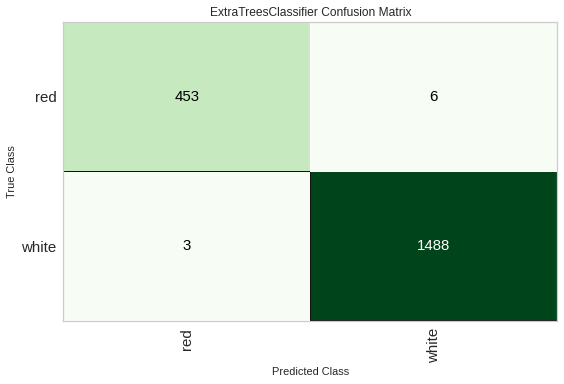

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
# plotar matriz de confusão
plot_model(tuned_et, plot='confusion_matrix')

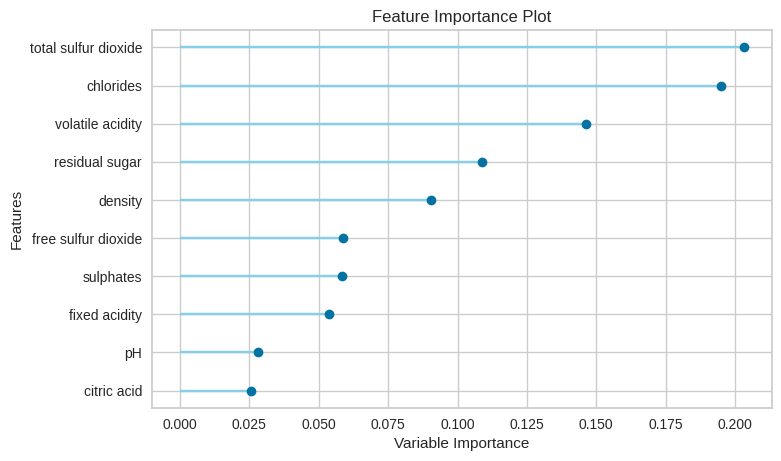

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
# feature importances
plot_model(tuned_et, plot='feature')

In [48]:
# avaliar modelo
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizar o Modelo

In [49]:
# realizando previsões
predict_model(tuned_et);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9954,0.9965,0.998,0.996,0.997,0.9871,0.9872


In [50]:
# finalizar previsões
final_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_

In [51]:
# verificar parâmetros
print(final_et)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False)


In [52]:
# realizar previsões com conjunto de teste
test_preds = predict_model(final_et, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=2795, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0,0.9983,0,0,0,0,0
